In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)

import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [17]:
from google.colab import files
files.upload()

Saving titanic_featured.csv to titanic_featured (1).csv


{'titanic_featured (1).csv': b'PassengerId,Survived,Age,SibSp,Parch,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rare\n1,0,22.0,1,0,7.25,2,True,False,True,False,True,False,False,False,True,False,False,False\n2,1,38.0,1,0,71.2833,2,False,False,False,False,False,False,False,False,False,True,False,False\n3,1,26.0,0,0,7.925,1,False,False,True,False,True,True,False,False,False,False,False,False\n4,1,35.0,1,0,53.1,2,False,False,True,False,False,False,False,False,False,True,False,False\n5,0,35.0,0,0,8.05,1,True,False,True,False,True,False,False,False,True,False,False,False\n6,0,28.0,0,0,8.4583,1,True,True,False,False,True,False,False,False,True,False,False,False\n7,0,54.0,0,0,51.8625,1,True,False,True,False,False,False,False,False,True,False,False,False\n8,0,2.0,3,1,21.075,5,True,False,True,False,True,False,False,False,False,False,False,False\n9,1,27.0,0,2,11.1333,3,False,False,True,False,True,False,False,Fa

In [18]:
df = pd.read_csv("titanic_featured.csv")
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rare
0,1,0,22.0,1,0,7.2500,2,True,False,True,False,True,False,False,False,True,False,False,False
1,2,1,38.0,1,0,71.2833,2,False,False,False,False,False,False,False,False,False,True,False,False
2,3,1,26.0,0,0,7.9250,1,False,False,True,False,True,True,False,False,False,False,False,False
3,4,1,35.0,1,0,53.1000,2,False,False,True,False,False,False,False,False,False,True,False,False
4,5,0,35.0,0,0,8.0500,1,True,False,True,False,True,False,False,False,True,False,False,False


In [19]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [23]:
log_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=5000))
])

In [24]:
log_pipeline.fit(X_train, y_train)

y_pred_log = log_pipeline.predict(X_test)

In [25]:
evaluate_model("Scaled Logistic Regression", y_test, y_pred_log)

 Scaled Logistic Regression Model Performance
Accuracy : 0.8379888268156425
Precision: 0.8225806451612904
Recall   : 0.7391304347826086
F1 Score : 0.7786259541984732

Confusion Matrix:
[[99 11]
 [18 51]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       110
           1       0.82      0.74      0.78        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179

--------------------------------------------------


In [26]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [27]:
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

In [29]:
def evaluate_model(name, y_test, y_pred):
    print(f" {name} Model Performance")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-"*50)

In [31]:
evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("SVM", y_test, y_pred_svm)

 Logistic Regression Model Performance
Accuracy : 0.8379888268156425
Precision: 0.8225806451612904
Recall   : 0.7391304347826086
F1 Score : 0.7786259541984732

Confusion Matrix:
[[99 11]
 [18 51]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       110
           1       0.82      0.74      0.78        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179

--------------------------------------------------
 Random Forest Model Performance
Accuracy : 0.8324022346368715
Precision: 0.8095238095238095
Recall   : 0.7391304347826086
F1 Score : 0.7727272727272727

Confusion Matrix:
[[98 12]
 [18 51]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       110
           1       0.81      0.74      0.77        69

    accuracy          

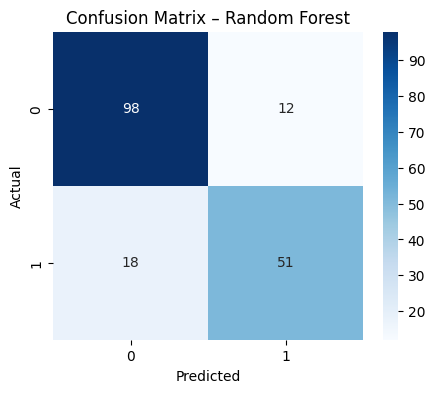

In [32]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf),
            annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

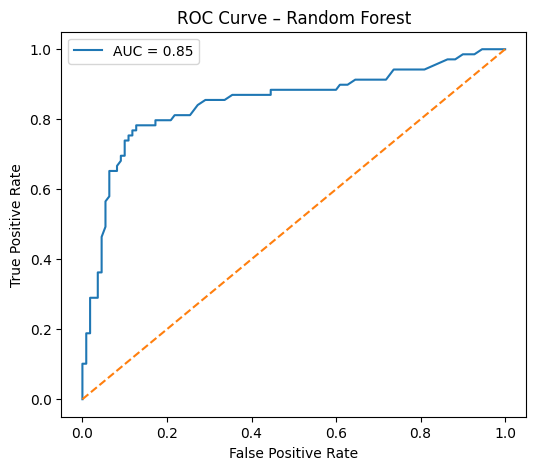

In [33]:
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest")
plt.legend()
plt.show()

In [34]:
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10]
}

grid = GridSearchCV(
    log_pipeline,
    param_grid,
    cv=5,
    scoring='f1'
)

grid.fit(X_train, y_train)

best_log_model = grid.best_estimator_

In [35]:
y_pred_best = best_log_model.predict(X_test)
evaluate_model("Tuned Scaled Logistic Regression", y_test, y_pred_best)

 Tuned Scaled Logistic Regression Model Performance
Accuracy : 0.8379888268156425
Precision: 0.8225806451612904
Recall   : 0.7391304347826086
F1 Score : 0.7786259541984732

Confusion Matrix:
[[99 11]
 [18 51]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       110
           1       0.82      0.74      0.78        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179

--------------------------------------------------


In [36]:
cv_scores = cross_val_score(
    best_log_model,
    X,
    y,
    cv=5,
    scoring='accuracy'
)

print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.83798883 0.82022472 0.80337079 0.78651685 0.87078652]
Mean CV Accuracy: 0.8237775406440274


In [38]:
import os

os.makedirs("models", exist_ok=True)

In [39]:
import pickle

pickle.dump(best_log_model, open("models/survival_model.pkl", "wb"))

In [40]:
from google.colab import files
files.download("models/survival_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>